In [156]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [157]:
#Load fashion MNIST dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_X,train_Y),(test_X,test_Y) = fashion_mnist.load_data()

In [158]:
print(train_Y.shape)

(60000,)


0: T_shirt
1: Trouser
2: Pullover
3: Dress
4: Coat
5: Sandal
6: Shirt
7: Sneaker
8: Bag
9: Ankle boot

In [159]:
selected_classes = {1:0,4:1,7:2,8:3}
def filterRelabel(images,labels):
    filter_indices = np.isin(labels,list(selected_classes.keys())) # train labels들중에 1,4,7,8 라벨이 포람된 인덱스들을 true로 반환
    filter_images = images[filter_indices]
    filter_labels = labels[filter_indices]
    new_labels = np.array([selected_classes[label] for label in filter_labels])
    return filter_images, new_labels

In [160]:
# 필터링 및 레이블 재설정
train_X_filtered, train_Y_filtered = filterRelabel(train_X, train_Y)
test_X_filtered, test_Y_filtered = filterRelabel(test_X, test_Y)

# 결과 확인
print("original Train Images Shape:", train_X.shape)
print("original Train Labels Distribution:", np.unique(train_Y, return_counts=True))
print("original Test Images Shape:", test_X.shape)
print("original Test Labels Distribution:", np.unique(test_Y, return_counts=True))
print('-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=after filtering and relabeling-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=')
print("Filtered Train Images Shape:", train_X_filtered.shape)
print("Filtered Train Labels Distribution:", np.unique(train_Y_filtered, return_counts=True))
print("Filtered Test Images Shape:", test_X_filtered.shape)
print("Filtered Test Labels Distribution:", np.unique(test_Y_filtered, return_counts=True))

original Train Images Shape: (60000, 28, 28)
original Train Labels Distribution: (array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))
original Test Images Shape: (10000, 28, 28)
original Test Labels Distribution: (array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000]))
-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=after filtering and relabeling-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
Filtered Train Images Shape: (24000, 28, 28)
Filtered Train Labels Distribution: (array([0, 1, 2, 3]), array([6000, 6000, 6000, 6000]))
Filtered Test Images Shape: (4000, 28, 28)
Filtered Test Labels Distribution: (array([0, 1, 2, 3]), array([1000, 1000, 1000, 1000]))


In [161]:
#Normalize intensities beteween 0 and 1
train_X_filtered = train_X_filtered / 255.0
test_X_filtered = test_X_filtered / 255.0

In [162]:
#Convert labels - one hot 인코딩 과정이라고 생각하면 됨.
train_Yc_filtered = tf.keras.utils.to_categorical(train_Y_filtered,num_classes=4)
test_Yc_filtered = tf.keras.utils.to_categorical(test_Y_filtered,num_classes=4)

In [163]:
print(train_Yc_filtered)
print(train_Y_filtered)
print('-=-=-=-=-=-=-=-=-=')
print(train_Yc_filtered.shape)
print(train_Y_filtered.shape)

[[0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 ...
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]]
[2 2 0 ... 2 3 0]
-=-=-=-=-=-=-=-=-=
(24000, 4)
(24000,)


In [164]:
#Display labels
print(train_Y_filtered[1],train_Yc_filtered[1])
print(train_Y_filtered[5],train_Yc_filtered[5])

2 [0. 0. 1. 0.]
1 [0. 1. 0. 0.]


In [165]:
#Display dimensions
print(train_X.shape,test_X.shape)
print(train_X_filtered.shape,test_X_filtered.shape)

(60000, 28, 28) (10000, 28, 28)
(24000, 28, 28) (4000, 28, 28)


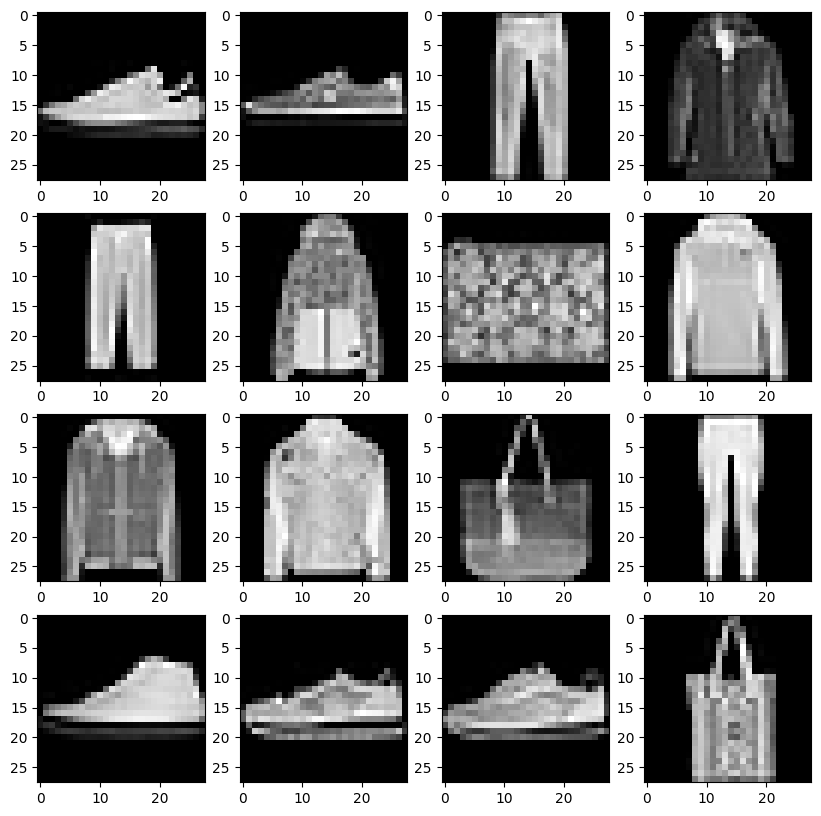

[2 2 0 1 0 1 3 1 1 1 3 0 2 2 2 3]


In [166]:
# Display images
plt.figure(figsize=(10, 10))
for c in range(16):
    plt.subplot(4,4,c+1)
    plt.imshow(train_X_filtered[c].reshape(28,28), cmap='gray')

plt.show()
print(train_Y_filtered[:16])

In [167]:
# Model building
# tf.keras.layers.Dense(units=128), /n tf.keras.layers.Activation('relu') ===> tf.keras.layers.Dense(units=128, activation='relu'),
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),                 # 입력: (28, 28) → 출력: (784,)
    tf.keras.layers.Dense(units=256, activation='relu'),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=4, activation='softmax')
])
model.summary()

/Users/an-uhyeon/MachineVisionSystem/.venv/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_16 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_59 (Dense)                │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_60 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_61 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_62 (Dense)                │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 242,372 (946.77 KB)

 Trainable params: 242,372 (946.77 KB)

 Non-trainable params: 0 (0.00 B)

In [168]:
model.compile(optimizer=tf.keras.optimizers.Adam(),loss='categorical_crossentropy',metrics=['accuracy'])                                                                                                                 

In [169]:
print(train_X_filtered.shape)
print(train_Yc_filtered.shape)
print(24000/36)

(24000, 28, 28)
(24000, 4)
666.6666666666666


In [170]:
print(train_X_filtered[0][15])

[0.         0.19607843 0.46666667 0.61960784 0.65098039 0.75294118
 0.8        0.77647059 0.73333333 0.79215686 0.79607843 0.82745098
 0.83921569 0.8        0.81960784 0.82352941 0.8        0.77254902
 0.74901961 0.74509804 0.74901961 0.89803922 0.90196078 0.94901961
 0.83921569 0.75686275 0.79607843 0.5372549 ]


In [171]:
history = model.fit(train_X_filtered,train_Yc_filtered,batch_size=36,epochs=10) # 36개의 미니배치 사이즈임 - SGD할떄

Epoch 1/10
667/667 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9561 - loss: 0.1374
Epoch 2/10
667/667 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9887 - loss: 0.0364
Epoch 3/10
667/667 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9908 - loss: 0.0305
Epoch 4/10
667/667 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9928 - loss: 0.0241
Epoch 5/10
667/667 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9932 - loss: 0.0208
Epoch 6/10
667/667 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9938 - loss: 0.0192
Epoch 7/10
667/667 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9945 - loss: 0.0165
Epoch 8/10
667/667 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9956 - loss: 0.0138
Epoch 9/10
667/667 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9953 - loss: 0.0129
Epoch 10/10
667/667 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9964 - loss: 0.0110


In [172]:
model.evaluate(test_X_filtered,test_Yc_filtered)

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9933 - loss: 0.0293   


[0.0368279293179512, 0.9915000200271606]

In [173]:
model.evaluate(train_X_filtered,train_Yc_filtered)

750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 986us/step - accuracy: 0.9982 - loss: 0.0053


[0.006255992688238621, 0.9981250166893005]

In [174]:
pred = model.predict(tf.expand_dims(test_X_filtered[0],axis=0))
print(pred,test_Y_filtered[0])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
[[1.0000000e+00 4.9270480e-11 7.6914105e-22 6.6173962e-11]] 0


In [175]:
print(test_X[70].shape)

(28, 28)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
answer :  2
pred :  2


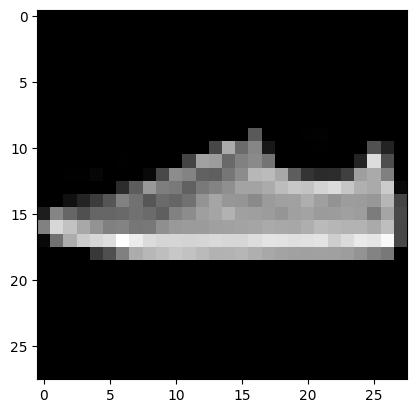

In [178]:
img = test_X_filtered[70]
pred = model.predict(tf.expand_dims(img,axis=0)) # tf와 같은 경우는 img를 3차원 형태로 넣어줘야함 맨 앞차원은 배치 사이즈로
plt.imshow(img,'gray')
print("answer : ",test_Y_filtered[70])
print("pred : ", pred[0].argmax())

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
answer :  0
pred :  0


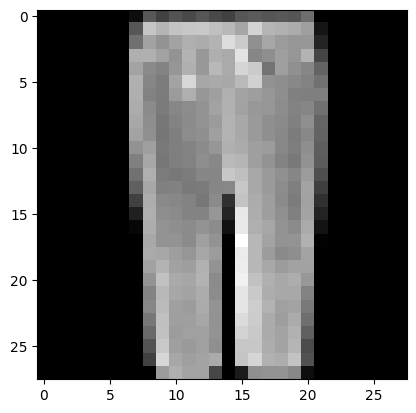

In [191]:
img = test_X_filtered[82]
pred = model.predict(tf.expand_dims(img,axis=0)) # tf와 같은 경우는 img를 3차원 형태로 넣어줘야함 맨 앞차원은 배치 사이즈로
plt.imshow(img,'gray')
print("answer : ",test_Y_filtered[82])
print("pred : ", pred[0].argmax())

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
answer :  3
pred :  3


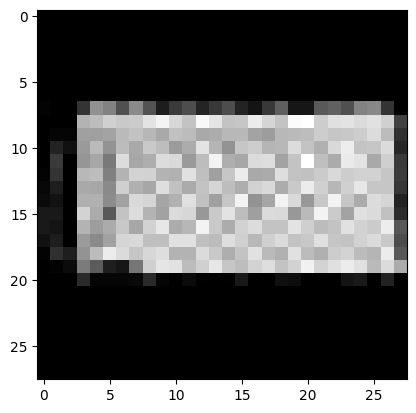

In [200]:
img = test_X_filtered[84]
pred = model.predict(tf.expand_dims(img,axis=0)) # tf와 같은 경우는 img를 3차원 형태로 넣어줘야함 맨 앞차원은 배치 사이즈로
plt.imshow(img,'gray')
print("answer : ",test_Y_filtered[84])
print("pred : ", pred[0].argmax())


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
answer :  1
pred :  1


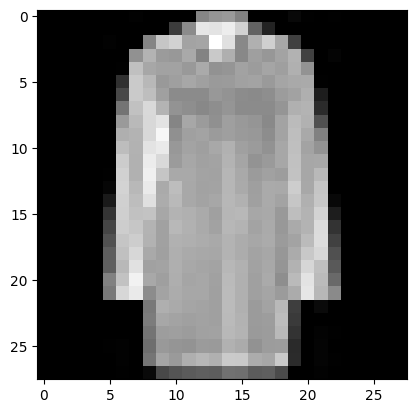

In [196]:
img = test_X_filtered[69]
pred = model.predict(tf.expand_dims(img,axis=0)) # tf와 같은 경우는 img를 3차원 형태로 넣어줘야함 맨 앞차원은 배치 사이즈로
plt.imshow(img,'gray')
print("answer : ",test_Y_filtered[69])
print("pred : ", pred[0].argmax())


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


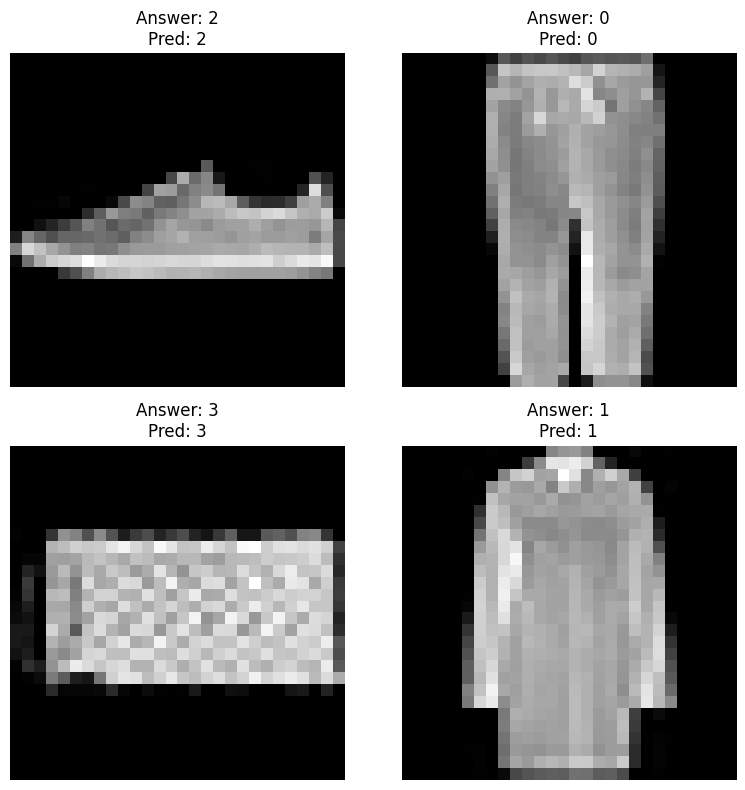

In [ ]:

# 이미지와 정답 데이터
imgs = [test_X_filtered[70], test_X_filtered[82], test_X_filtered[84], test_X_filtered[69]]
answers = [test_Y_filtered[70], test_Y_filtered[82], test_Y_filtered[84], test_Y_filtered[69]]

# 모델 예측
preds = [model.predict(tf.expand_dims(img, axis=0))[0].argmax() for img in imgs]

# 시각화
fig, axes = plt.subplots(2, 2, figsize=(8, 8))  # 2x2 그래프
for i, ax in enumerate(axes.flat):
    ax.imshow(imgs[i], cmap='gray')  # 이미지 출력
    ax.set_title(f"Answer: {answers[i]}\nPred: {preds[i]}")  # 제목 설정
    ax.axis('off')  # 축 숨기기

plt.tight_layout()  # 레이아웃 조정
plt.show()


In [ ]:
import numpy as np

# 모델의 예측값 계산
predictions = model.predict(test_X_filtered)  # 예측값 계산 (배치 전체 예측)
predicted_labels = np.argmax(predictions, axis=1)  # 각 샘플의 예측 클래스

# 정답값
true_labels = np.array(test_Y_filtered)  # 정답값 배열로 변환

# 예측이 틀린 인덱스 찾기
incorrect_indices = np.where(predicted_labels != true_labels)[0]

print(f"총 {len(incorrect_indices)}개의 예측 오류가 있습니다.")
print("예측 오류 인덱스:", incorrect_indices)

# # 예를 들어, 첫 번째 오류의 정보 출력
# if len(incorrect_indices) > 0:
#     first_incorrect_idx = incorrect_indices[0]
#     print(f"첫 번째 오류 - 인덱스: {first_incorrect_idx}")
#     print(f"정답: {true_labels[first_incorrect_idx]}, 예측: {predicted_labels[first_incorrect_idx]}")


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 807us/step
총 34개의 예측 오류가 있습니다.
예측 오류 인덱스: [ 527  594  598  806  969 1003 1137 1183 1228 1258 1262 1347 1419 1633
 1669 1722 1963 2074 2208 2259 2278 2313 2524 2631 2914 3112 3220 3428
 3487 3669 3773 3792 3848 3955]
첫 번째 오류 - 인덱스: 527
정답: 3, 예측: 2


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
answer :  3
pred :  2


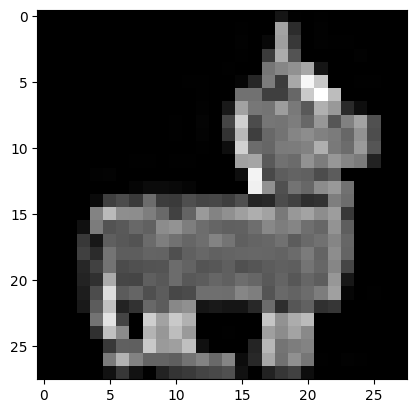

In [203]:
img = test_X_filtered[527]
pred = model.predict(tf.expand_dims(img,axis=0)) # tf와 같은 경우는 img를 3차원 형태로 넣어줘야함 맨 앞차원은 배치 사이즈로
plt.imshow(img,'gray')
print("answer : ",test_Y_filtered[527])
print("pred : ", pred[0].argmax())

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 785us/step
총 34개의 예측 오류가 있습니다.


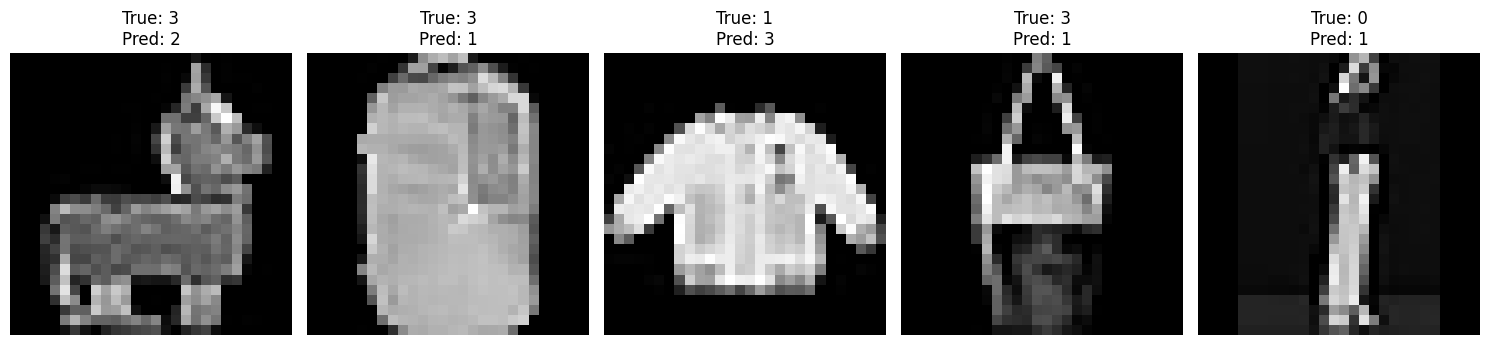

In [205]:
import numpy as np
import matplotlib.pyplot as plt

# 모델의 예측값 계산
predictions = model.predict(test_X_filtered)  # 모든 테스트 데이터에 대한 예측값
predicted_labels = np.argmax(predictions, axis=1)  # 예측 클래스
true_labels = np.array(test_Y_filtered)  # 정답값

# 예측이 틀린 데이터의 인덱스 찾기
incorrect_indices = np.where(predicted_labels != true_labels)[0]

# 시각화: 예측이 틀린 데이터 표시
print(f"총 {len(incorrect_indices)}개의 예측 오류가 있습니다.")

# 최대 5개의 틀린 데이터 시각화
num_to_display = min(len(incorrect_indices), 5)  # 최대 5개만 표시
fig, axes = plt.subplots(1, num_to_display, figsize=(15, 5))

for i, idx in enumerate(incorrect_indices[:num_to_display]):
    ax = axes[i]
    ax.imshow(test_X_filtered[idx], cmap='gray')  # 이미지 표시
    ax.set_title(f"True: {true_labels[idx]}\nPred: {predicted_labels[idx]}")
    ax.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
#   Trouser(0), Coat(1), Sneaker(2), Bag(3)

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
총 34개의 예측 오류가 있습니다.


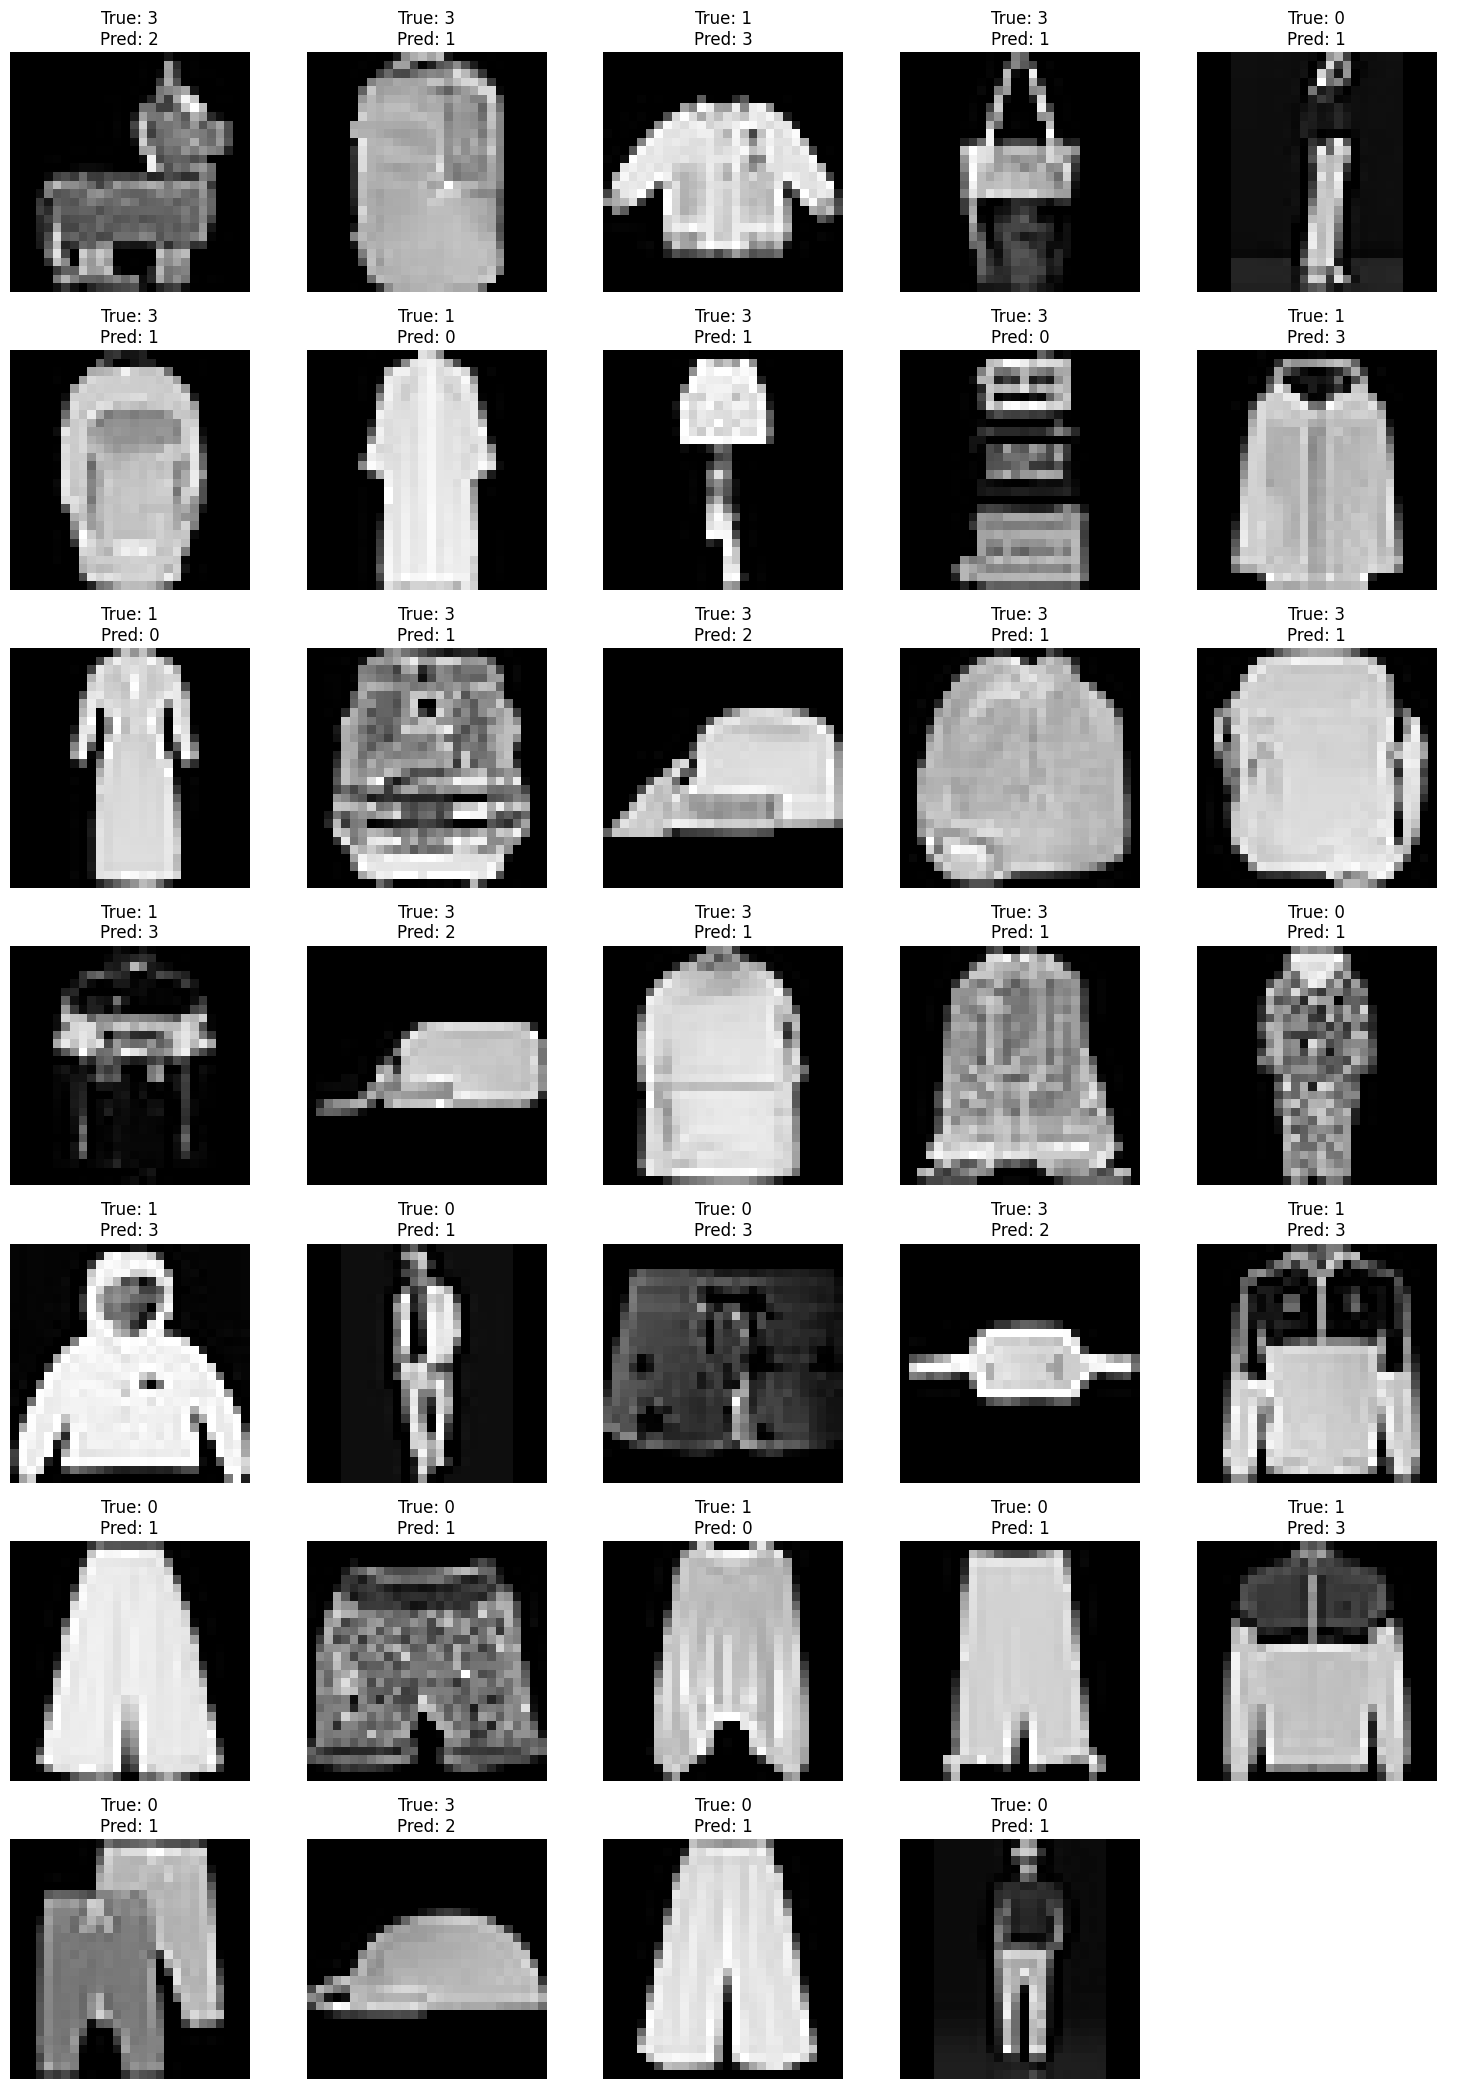

In [206]:
import numpy as np
import matplotlib.pyplot as plt

# 모델의 예측값 계산
predictions = model.predict(test_X_filtered)  # 테스트 데이터 전체 예측값
predicted_labels = np.argmax(predictions, axis=1)  # 예측 클래스
true_labels = np.array(test_Y_filtered)  # 정답값

# 예측이 틀린 데이터의 인덱스 찾기
incorrect_indices = np.where(predicted_labels != true_labels)[0]

print(f"총 {len(incorrect_indices)}개의 예측 오류가 있습니다.")

# 시각화: 모든 예측 오류 데이터 표시
num_incorrect = len(incorrect_indices)
cols = 5  # 한 줄에 표시할 이미지 수
rows = (num_incorrect + cols - 1) // cols  # 행 개수 계산

fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 3))

# 틀린 데이터 시각화
for i, idx in enumerate(incorrect_indices):
    row, col = divmod(i, cols)
    ax = axes[row, col]
    ax.imshow(test_X_filtered[idx], cmap='gray')  # 이미지 표시
    ax.set_title(f"True: {true_labels[idx]}\nPred: {predicted_labels[idx]}")
    ax.axis('off')

# 빈 칸 처리 (틀린 데이터 개수가 cols의 배수가 아닌 경우)
for i in range(len(incorrect_indices), rows * cols):
    row, col = divmod(i, cols)
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()
